In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd 

In [2]:
wuliang=pd.read_csv('C:\\Users\\kevin\\Desktop\\五粮液.csv')
wuliang=wuliang/100
wuliang=wuliang.to_numpy()

In [3]:
sanyi=pd.read_csv('C:\\Users\\kevin\\Desktop\\三一重工.csv')
sanyi=sanyi/100
sanyi=sanyi.to_numpy()

In [4]:
shangzheng=pd.read_csv('C:\\Users\\kevin\\Desktop\\上证指数.csv')
shangzheng=shangzheng/100
shangzheng=shangzheng.to_numpy()

In [5]:
sanyi.reshape(1,486)
wuliang.reshape(1,486)

array([[ 1.97280e-02, -2.08940e-02,  1.02750e-02, -2.73800e-03,
        -1.90230e-02,  1.39900e-03, -6.18900e-03,  9.24100e-03,
         3.78200e-03,  3.88660e-02,  5.15370e-02, -2.54100e-03,
        -7.28000e-04, -3.47840e-02,  3.77400e-03, -1.63530e-02,
         9.36400e-03,  6.62600e-03,  1.57980e-02, -1.88850e-02,
        -3.20800e-03,  2.27200e-03, -7.17800e-03, -1.33180e-02,
        -2.42960e-02,  7.11500e-03, -1.96200e-03, -8.84800e-03,
        -5.15800e-03,  1.45560e-02, -1.84750e-02, -1.96240e-02,
         1.18460e-02, -4.64300e-03, -5.88100e-03,  2.06040e-02,
        -3.39800e-03,  1.66470e-02, -2.17010e-02,  6.81590e-02,
        -1.45370e-02, -5.36400e-03,  3.77500e-02,  3.93470e-02,
        -1.41070e-02, -2.53600e-03,  2.36100e-03,  9.06000e-04,
         4.01810e-02,  1.93140e-02, -2.21920e-02,  5.27230e-02,
         1.45940e-02,  5.75350e-02,  7.73000e-04,  2.03860e-02,
         2.86060e-02, -2.29550e-02,  5.22590e-02, -2.86200e-03,
        -9.47300e-03, -1.39110e-02,  6.6

In [6]:
mean_sanyi=np.mean(sanyi)
mean_wuliang=np.mean(wuliang)

In [7]:
mean_sanyi

0.0028528353909465023

In [8]:
mean_wuliang

0.0037665925925925926

In [9]:
std_wuliang=np.std(wuliang,ddof=1)
std_sanyi=np.std(sanyi,ddof=1)

In [10]:
std_sanyi

0.023465201152767862

In [11]:
std_wuliang

0.024744836377372865

In [12]:
sum = 0
for i in range(0, len(wuliang)):
    sum += ((wuliang[i] - mean_wuliang) * (sanyi[i] -mean_sanyi))
cov=sum/(len(wuliang)-1)
print(cov)    

[0.00027364]


In [13]:
coefficient=cov/(std_wuliang*std_sanyi)
coefficient

array([0.47126968])

绘制投资回报曲线

In [14]:
W_wuliang=np.linspace(0,1,20)
W_sanyi=1-W_wuliang

In [15]:
E_all=W_wuliang*mean_wuliang+W_sanyi*mean_sanyi
std_all=np.sqrt((W_wuliang*std_wuliang)**2+(W_sanyi*std_sanyi)**2+2*(W_sanyi*std_sanyi)*(W_wuliang*std_wuliang)*coefficient)

Text(0, 0.5, 'Expected return')

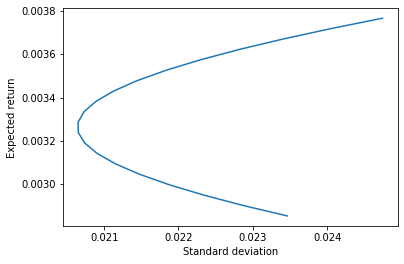

In [16]:
plt.plot(std_all,E_all)
plt.xlabel('Standard deviation')
plt.ylabel('Expected return')

In [17]:
r=np.array([0.00136])

In [18]:
R_wuliang=mean_wuliang-r
R_sanyi=mean_sanyi-r

In [19]:
B_wuliang=(R_wuliang*std_sanyi**2-R_sanyi*std_sanyi*std_wuliang*coefficient)/(R_wuliang*std_sanyi**2+R_sanyi*std_wuliang**2-(R_sanyi+R_wuliang)*std_sanyi*std_wuliang*coefficient)
B_wuliang

array([0.78199336])

In [20]:
B_sanyi=1-B_wuliang

In [21]:
B_all=B_wuliang*mean_wuliang+B_sanyi*mean_sanyi
B_all

array([0.00356739])

In [22]:
B_std=np.sqrt((B_wuliang*std_wuliang)**2+(B_sanyi*std_sanyi)**2+2*(B_sanyi*std_sanyi)*(B_wuliang*std_wuliang)*coefficient)
B_std

array([0.02222393])

In [23]:
sharpe_ratio=(B_all-r)/B_std
sharpe_ratio

array([0.09932481])

Text(0, 0.5, 'Expected return')

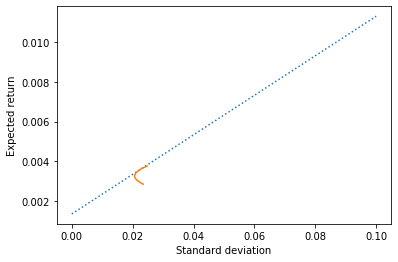

In [24]:
x=np.linspace(0,0.1,20)
y=sharpe_ratio*x+r
plt.plot(x,y,linestyle=':')
plt.plot(std_all,E_all)
plt.xlabel('Standard deviation')
plt.ylabel('Expected return')

第二project

In [25]:
R_sanyi=sanyi-r
R_shangzheng=shangzheng-r

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
R_sanyi_1=R_sanyi.reshape(-1,1)
R_shangzheng_1=R_shangzheng.reshape(-1,1)

In [28]:
reg=LinearRegression().fit(R_shangzheng_1,R_sanyi_1)
a,b=reg.coef_,reg.intercept_
print(a,b)

[[1.19472694]] [0.00236199]


In [29]:
x=np.linspace(-0.1,0.1,20)
y=a*x+b

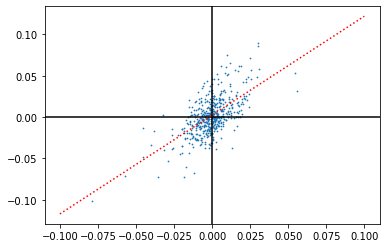

In [30]:
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0,color='black', linestyle='-')
plt.plot(x,y.reshape(20,1),color='r',linestyle=':')
plt.scatter(R_shangzheng,R_sanyi,s=0.5)
plt.show()

In [31]:
import statsmodels.api as sm

In [32]:
R_shangzheng_1= sm.add_constant(R_shangzheng_1)
model = sm.OLS(R_sanyi_1,R_shangzheng_1)
clf = model.fit()

In [33]:
clf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     318.1
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           4.68e-55
Time:                        21:19:45   Log-Likelihood:                 1257.2
No. Observations:                 486   AIC:                            -2510.
Df Residuals:                     484   BIC:                            -2502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.001      2.849      0.005       0.001       0.004
x1             1.1947      0.067     17.835      0.000       1.063       1.326
==============================================================================
Omnibus:                       15.788   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.383
Skew:                           0.380   Prob(JB):                     0.000168
Kurtosis:                       3.529   Cond. No.                         80.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
R_wuliang=wuliang-r

In [35]:
R_wuliang_1=R_wuliang.reshape(-1,1)

In [45]:
R_shangzheng_1=R_shangzheng.reshape(-1,1)

In [39]:
reg=LinearRegression().fit(R_shangzheng_1,R_wuliang_1)
a1,b1=reg.coef_,reg.intercept_
print(a1,b1)

[[1.31074959]] [0.00336015]


In [40]:
x1=np.linspace(-0.1,0.1,20)
y1=a1*x+b1

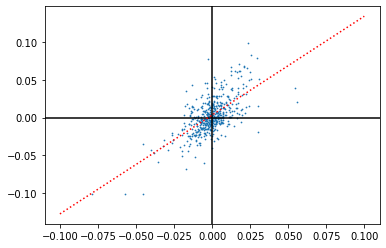

In [41]:
plt.axhline(y=0, color='black', linestyle='-')
plt.axvline(x=0,color='black', linestyle='-')
plt.plot(x1,y1.reshape(20,1),color='r',linestyle=':')
plt.scatter(R_shangzheng,R_wuliang,s=0.5)
plt.show()

In [42]:
R_shangzheng_1= sm.add_constant(R_shangzheng_1)
model = sm.OLS(R_wuliang_1,R_shangzheng_1)
clf = model.fit()

In [43]:
clf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     364.0
Date:                Wed, 09 Dec 2020   Prob (F-statistic):           6.35e-61
Time:                        21:22:37   Log-Likelihood:                 1245.0
No. Observations:                 486   AIC:                            -2486.
Df Residuals:                     484   BIC:                            -2478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0034      0.001      3.952      0.000       0.002       0.005
x1             1.3107      0.069     19.079      0.000       1.176       1.446
==============================================================================
Omnibus:                       28.858   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.007
Skew:                           0.452   Prob(JB):                     4.58e-10
Kurtosis:                       4.142   Cond. No.                         80.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

standard error

In [55]:
import math 

In [61]:
se_1=0
for x in range(486):
    se_1+=(R_shangzheng_1[x]*1.31074959+0.00336015-R_sanyi_1[x])**2
se_1=se_1/np.sqrt(486)    
print(se_1)    

[0.00737337]


In [62]:
se_1*10000 

array([73.73368243])

In [65]:
se_2=0
for x in range(486):
    se_2+=(R_shangzheng_1[x]*1.19472694+0.00236199-R_wuliang_1[x])**2
se_2=se_2/np.sqrt(486)    
print(se_2)    

[0.00775224]


In [66]:
se_2*10000 

array([77.52236503])